# 2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474_rep2

Brief experiment description:

* 1:150 1.5 hours, 1:750 5 hours, 100 into 200 uL PBS for cyt.
* Testing relative levels of RPU construct in each landing pad
* All strains are sequence confirmed

Experimental variables:
* Which landing pad contains PJ23101-YFP
    - determined by strain number

Notes on experiment:

* FITC-A is the output channel (YFP)

### Strains

#### Experiment
| strain number | parent strain | Description               | 
|---------------|---------------|-------------------------------|
| AJT472  | EcN | PJ23101-YFP in LPattB5     |
| AJT473  | EcN | PJ23101-YFP in LPattB2     |
| AJT474  | EcN | PJ23101-YFP in LPattB7     |   


### Protocol

 - Overnight in M9 + kan
 - M9
     * Dilute 1:150 in 500 uL deep-well plate, grow for 1.5 hours
     * Dilute 1:750 into 500 uL in deep-well plate, grow for 5 hours
         - cells were a little dilute at end
     * 100 uL culture into 200 uL PBS + kan

In [2]:
# Matplotlib interactivity
#matplotlib notebook
import matplotlib
matplotlib.rc('figure', dpi = 160)
matplotlib.rcParams['pdf.fonttype'] = 42 # for making font editable when exported to PDF for Illustrator
matplotlib.rcParams['ps.fonttype'] = 42 # for making font editable when exported to PS for Illustrator

# Set the default sans-serif font to Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Set to always use sans-serif fonts
matplotlib.rcParams['font.family'] = "sans-serif"

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import sys
import cytoflow as flow
import string
import pandas as pd
import pickle
from scipy.optimize import least_squares
from matplotlib.lines import Line2D

# Dan's custom scripts that aid in importing from conditions.csv file
sys.path.append('/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules')
import cf_imports
import cf_helpers

In [4]:
# Import reloads for when modules are being changed
import importlib
importlib.reload(cf_imports)
importlib.reload(cf_helpers)

<module 'cf_helpers' from '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/cytoflow_example_fromDan/modules/cf_helpers.py'>

## Data Import

In [5]:
# Provide full path to flow cytometry .fcs file directory and pass to fixer
fcs_dir = cf_imports.dir_fix(
    r'/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry Data/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_rep2/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474')
# Optional specification of conditions directory (default to same directory as data)
conds_dir = None



In [6]:
# Create experiment from fcs files and conditions file ()
exp = cf_imports.exp_from_dirs(fcs_dir, conds_dir)

['/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_rep2/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A1_A01.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_rep2/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A2_A02.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_rep2/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A3_A03.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_rep2/2021-01-13_EcN_LPs_RelativeExpression_M9_300minInduction_AJT472_473_474/Specimen_001_A4_A04.fcs',
 '/Users/atriassi/Dropbox (MIT)/Voigt Lab/_Data/Flow Cytometry '
 'Data/

In [7]:
# Check dataframe 
exp.data.head(10)
# exp2.data.head(10)
# exp3.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num
0,921.630005,876.0,12889.640625,12704.0,37.740002,21.0,2.040000,61.0,27642.390625,29736.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
1,950.460022,839.0,13914.270508,11194.0,8.880000,31.0,65.279999,75.0,22094.939453,24871.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
2,870.479980,880.0,12101.220703,9405.0,44.400002,32.0,116.279999,52.0,26617.529297,28749.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
3,1050.900024,881.0,14790.380859,12172.0,-5.920000,19.0,222.360001,71.0,24166.050781,26072.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
4,1836.750000,990.0,24225.351562,13650.0,-26.639999,39.0,129.539993,99.0,47073.808594,26910.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
5,2731.409912,1482.0,22123.160156,13110.0,-29.600000,17.0,137.699997,61.0,90433.203125,52378.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
6,842.580017,764.0,10711.610352,8256.0,9.620000,44.0,62.219997,56.0,38892.601562,38468.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
7,775.619995,724.0,11301.740234,8749.0,-22.200001,28.0,44.879997,53.0,22444.621094,25088.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
8,525.450012,624.0,10705.290039,7741.0,8.140000,24.0,31.619999,69.0,16218.270508,19248.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1
9,1154.130005,999.0,13108.470703,12467.0,13.320000,33.0,57.119999,82.0,37811.941406,38064.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1


In [8]:
exp.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp2.data.groupby(['parent_strain','strain_num', 'iptg']).size()
# exp3.data.groupby(['parent_strain','strain_num', 'iptg']).size()

parent_strain  strain_num  iptg
EcN            AJT473      0.0     61339
               AJT473-1    0.0     63235
               AJT474-1    0.0     60315
               AJT472-1    0.0     61897
               AJT474-2    0.0     58569
               AJT474      0.0     59468
               AJT473-2    0.0     60632
               blank       0.0     76820
               AJT472      0.0     63416
               AJT472-2    0.0     60042
dtype: int64

## Gating

### FSC / SSC

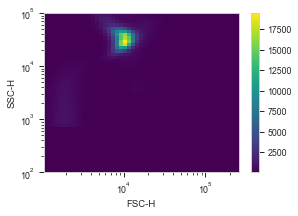

In [9]:
scatter = flow.DensityView(
    xchannel = "FSC-H",
    ychannel = "SSC-H",
    yscale = "log",
    xscale = "log")

scatter.plot(exp, ylim=(100,100000))

Gate FSC-A / SSC-A w/ Guassian w/ 2 sigma stddeviation

In [10]:
g2 = flow.PolygonOp(name = "Debris_Filter",
                    xchannel = "FSC-H",
                    ychannel = "SSC-H",
                    xscale = 'log',
                    yscale = 'log')

g2.vertices = [(4000, 10000), # bottom left
             (18000, 18000), # bottom right
             (18000, 55000), # top right
             (4000, 35000)] # top left

In [11]:
# for polygon gating as opposed to using Gaussian mixture model
exp_gated = g2.apply(exp)

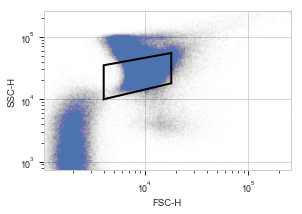

In [12]:
# takes a minute or two to run
g2.default_view().plot(exp_gated, alpha = 0.002)

In [13]:
exp_gated.data.head(10)
# exp2_gated.data.head(10)
# exp3_gated.data.head(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
0,921.630005,876.0,12889.640625,12704.0,37.740002,21.0,2.040000,61.0,27642.390625,29736.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
1,950.460022,839.0,13914.270508,11194.0,8.880000,31.0,65.279999,75.0,22094.939453,24871.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
2,870.479980,880.0,12101.220703,9405.0,44.400002,32.0,116.279999,52.0,26617.529297,28749.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
3,1050.900024,881.0,14790.380859,12172.0,-5.920000,19.0,222.360001,71.0,24166.050781,26072.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
4,1836.750000,990.0,24225.351562,13650.0,-26.639999,39.0,129.539993,99.0,47073.808594,26910.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
5,2731.409912,1482.0,22123.160156,13110.0,-29.600000,17.0,137.699997,61.0,90433.203125,52378.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,False
6,842.580017,764.0,10711.610352,8256.0,9.620000,44.0,62.219997,56.0,38892.601562,38468.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
7,775.619995,724.0,11301.740234,8749.0,-22.200001,28.0,44.879997,53.0,22444.621094,25088.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
8,525.450012,624.0,10705.290039,7741.0,8.140000,24.0,31.619999,69.0,16218.270508,19248.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True
9,1154.130005,999.0,13108.470703,12467.0,13.320000,33.0,57.119999,82.0,37811.941406,38064.0,51.5,1,0.0,M9,EcN,2,A,1,AJT472-1,True


In [14]:
# should use Debris_Filter_2 if using Gaussian Mixture Model, otherwise Debris_Filter
exp_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()
# exp2_gated.data.groupby(['Debris_Filter','parent_strain','strain_num', 'media', 'iptg']).size()

Debris_Filter  parent_strain  strain_num  media  iptg
False          EcN            AJT473      M9     0.0     21053
                              AJT473-1    M9     0.0     22990
                              AJT474-1    M9     0.0     17276
                              AJT472-1    M9     0.0     18245
                              AJT474-2    M9     0.0     14607
                              AJT474      M9     0.0     16937
                              AJT473-2    M9     0.0     20087
                              blank       blank  0.0     68222
                              AJT472      M9     0.0     20550
                              AJT472-2    M9     0.0     12674
True           EcN            AJT473      M9     0.0     40286
                              AJT473-1    M9     0.0     40245
                              AJT474-1    M9     0.0     43039
                              AJT472-1    M9     0.0     43652
                              AJT474-2    M9     0.0     43962
 

In [15]:
exp_gated_df = exp_gated.data
# exp2_gated_df = exp2_gated.data

filtered  = exp_gated_df[(exp_gated_df['Debris_Filter']==True)&(exp_gated_df['strain_num']!='blank')]
#picked debris filter that looked best qualitatitvely and excluded blank wells

# filtered.head(10)
filtered.tail(10)

,FITC-A,FITC-H,FSC-A,FSC-H,PE-Texas Red-A,PE-Texas Red-H,Pacific Blue-A,Pacific Blue-H,SSC-A,SSC-H,Time,col,iptg,media,parent_strain,replicate,row,sample_num,strain_num,Debris_Filter
621235,1250.849976,1148.0,10757.430664,10736.0,69.559998,37.0,69.360001,33.0,44859.480469,41672.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621236,1611.690063,825.0,19403.980469,11301.0,48.100002,20.0,38.759998,64.0,52189.742188,25177.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621237,811.890015,705.0,10507.790039,8908.0,14.060000,21.0,-17.340000,45.0,23891.699219,22920.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621238,1058.339966,1088.0,14095.970703,12893.0,22.200001,31.0,69.360001,44.0,41905.800781,39354.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621239,535.679993,441.0,7931.600098,9781.0,34.040001,29.0,135.660004,45.0,32693.220703,31729.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621240,895.590027,824.0,5209.260254,10276.0,25.900000,8.0,91.799995,37.0,31031.310547,30052.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621241,759.809998,938.0,10283.430664,8434.0,1.480000,18.0,-90.779999,37.0,29648.400391,27853.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621242,1577.280029,1264.0,13852.650391,11949.0,8.140000,30.0,-63.239998,62.0,50910.058594,46832.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621243,1036.020020,975.0,8703.430664,8739.0,13.320000,16.0,-66.299995,16.0,29033.669922,28235.0,897.700012,5,0.0,M9,EcN,2,C,17,AJT474-2,True
621244,615.660034,594.0,10023.520508,7542.0,44.400002,34.0,21.420000,37.0,20832.000000,20369.0,897.799988,5,0.0,M9,EcN,2,C,17,AJT474-2,True


# Start from here

In [16]:
## pickle allows you to save an object as binary so it can be re-opened next time without re-running
## all of the code that loaded it

pickle.dump(exp_gated_df, open("pickledata_gated.p", "wb")) # wb is for writing binary
# exp_gated_df = pickle.load(open("pickledata_gated.p", "rb")) # rb is for reading binary

# # pickle.dump(exp2_gated_df, open("pickledata2_gated.p", "wb")) # wb is for writing binary
# exp2_gated_df = pickle.load(open("pickledata2_gated.p", "rb")) # rb is for reading binary

pickle.dump(filtered, open("pickledata_filtered.p", "wb")) # wb is for writing binary
# filtered = pickle.load(open("pickledata_filtered.p", "rb")) # rb is for reading binary

## Calculating Medians

In [17]:
parent = sorted(filtered['parent_strain'].unique()) # get strain numbers in experiment
print(parent)

['EcN']


In [18]:
strains = sorted(filtered['strain_num'].unique()) # get strain numbers in experiment
print(strains)

['AJT472', 'AJT472-1', 'AJT472-2', 'AJT473', 'AJT473-1', 'AJT473-2', 'AJT474', 'AJT474-1', 'AJT474-2']


In [19]:
media = sorted(filtered['media'].unique()) # get media used in experiment
print(media)

['M9']


In [20]:
data_dict = dict() # initiate dictionary

# make  nested dictionary with medians in it for each condition (media, inducer, concentration, strain)
for s in ['AJT472','AJT473','AJT474']:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_dict[s] = q['FITC-A'].median()
    
data = pd.Series(data_dict)

In [21]:
# pickle.dump(data, open("data.p", "wb")) # wb is for writing binary

In [22]:
data_dict

{'AJT472': 1089.9599609375,
 'AJT473': 951.3900146484375,
 'AJT474': 890.010009765625}

In [23]:
# # controls['M9']['EcN'].loc[[~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])],'AJT206']
# print(controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])])
# auto = (controls['M9']['EcN'].loc[:,'AJT206'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT206'])]).mean(axis=0)


# # print(controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])])
# # RPUg = (controls['M9']['EcN'].loc[:,'AJT280'][~np.isnan(controls['M9']['EcN'].loc[:,'AJT280'])]).mean(axis=0)

%store -r AJT206_auto_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
# %store -r AJT280_RPUg_store # from 2020-09-22_EcN_Sensors_AllReplicates_v2
auto = AJT206_auto_store
# RPUg = AJT280_RPUg_store

print()
print(auto)
# print(RPUg)

no stored variable # from 2020-09-22_EcN_Sensors_AllReplicates_v2

33.25156319141388


In [24]:
data['AJT472']

1089.9599609375

In [28]:
# AJT472_r2_au_store = data['AJT472']
# AJT473_r2_au_store = data['AJT473']
# AJT474_r2_au_store = data['AJT474']

# %store AJT472_r2_au_store
# %store AJT473_r2_au_store
# %store AJT474_r2_au_store


Stored 'AJT472_r2_au_store' (float64)
Stored 'AJT473_r2_au_store' (float64)
Stored 'AJT474_r2_au_store' (float64)


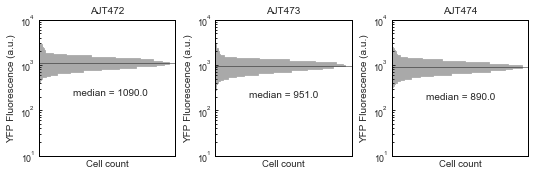

In [26]:
## Histogram-style transfer functions like in Cello SI

data_his_dict = dict() # initiate dictionary

fig_his, ax_his = plt.subplots(1,3, figsize=(7.5,2.5)) # row, column format
plt.tight_layout() #tidies up spacing between plots

strains_subset = ['AJT472','AJT473','AJT474']

for s in strains_subset:
    q = filtered.query('strain_num == "{}"'.format(s))
    data_his_dict[s] = q['FITC-A']
                    
    FP = ax_his[strains_subset.index(s)]

    for spine in FP.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1)

#                 print(strains_subset.index(s), inducer_info[i]['conc'].index(c))
    logbins = np.geomspace(10,10000,100)
    FP.hist(q['FITC-A'], 
               bins = logbins, 
               orientation='horizontal',
               color = 'darkgray',
               edgecolor = 'darkgray',
               zorder=-1)
    FP.set_yscale('log')
    FP.set_ylim(10,10000)
    FP.tick_params(axis='both',which='both', 
                               bottom=False,top=False,
                               labelbottom=False,
                               right=False,left=False,
                               labelleft=False)
    FP.grid(False)
    FP.set_ylabel('YFP Fluorescence (a.u.)', size=10)
    FP.set_xlabel('Cell count')
    FP.set_title(s, size = 10)
    FP.tick_params(axis='y',which='major',left=True, length=3, width=1, labelleft=True, direction='in')
    FP.tick_params(axis='y',which='minor', left=True, length=1.5, width=1, direction='in')     
    
    xmin, xmax = FP.get_xlim()
    FP.set_xlim(xmin,xmax)
    FP.hlines(data[s],xmin,xmax, linewidth = 0.5)
    FP.text(xmax/4,data[s]/5,'median = {}'.format(round(data[s], 0)), size = 10)

                
                

In [27]:
# fig_his.savefig('RPUconstruct_RelativeExpressionAcrossLPs.pdf', bbox_inches = "tight", transparent = True)
